In [91]:
!pip install mplfinance

In [98]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
# from mpl_finance import candlestick_ohlc
import mplfinance as mpf

from binance.client import Client
from config import *

client = Client(api_key, api_secret)

In [3]:
client.futures_historical_klines?

### funciones

In [65]:
### OHLCV
L3m = client.futures_historical_klines(
    symbol=f'DOTUSDT',
    interval='5m',
    start_str='09-20-2021 08:00:00',
    end_str='10-01-2021 19:00:00',
    limit=1000
)

arr_l = np.array(L3m).astype(np.float64)
index = pd.DatetimeIndex(pd.to_datetime(arr_l[:, 0], unit='ms'))#.tz_localize('UTC')#.tz_convert('America/Lima')
df_serie = pd.DataFrame(arr_l[:, 4], index=index)
SS = np.array(df_serie[0])
SS.shape

(3301,)

In [130]:
def heikenashi(df):
    do = df.copy()
    do['HA_Close'] = (do['Open'] + do['High'] + do['Low'] + do['Close']) / 4
    do['HA_Open'] = (do['Open'].shift(1) + do['Open'].shift(1)) / 2
    do.iloc[0, do.columns.get_loc("HA_Open")] = (do.iloc[0]['Open'] + do.iloc[0]['Close'])/2
    do['HA_High'] = do[['High', 'Low', 'HA_Open', 'HA_Close']].max(axis=1)
    do['HA_Low'] = do[['High', 'Low', 'HA_Open', 'HA_Close']].min(axis=1)
    do = do.drop(['Open', 'High', 'Low', 'Close'], axis=1)  # remove old columns
    do = do.rename(columns={"HA_Open": "Open", "HA_High": "High", "HA_Low": "Low", "HA_Close": "Close"})#, "Volume": "Volume"})
    do = do[['Open', 'High', 'Low', 'Close']]  # reorder columns
    return do

In [129]:
def HA(df):
    df_ha = df.copy()
    for i in range(df_ha.shape[0]):
        if i > 0:
            df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i-1] + df['Close'][i-1])/2

        df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
    df_ha = df_ha.iloc[1:,:]
    return df_ha

### stuff

In [131]:
ds = pd.DataFrame(arr_l[:, 1:5], columns=['Open', 'High', 'Low', 'Close'], index=index)
print(ds.shape)
ds.head()

(3301, 4)


,Open,High,Low,Close
2021-09-20 08:00:00,30.679,30.758,30.460,30.758
2021-09-20 08:05:00,30.756,30.913,30.570,30.907
2021-09-20 08:10:00,30.901,30.996,30.718,30.722
2021-09-20 08:15:00,30.722,30.825,30.565,30.604
2021-09-20 08:20:00,30.603,30.784,30.566,30.744


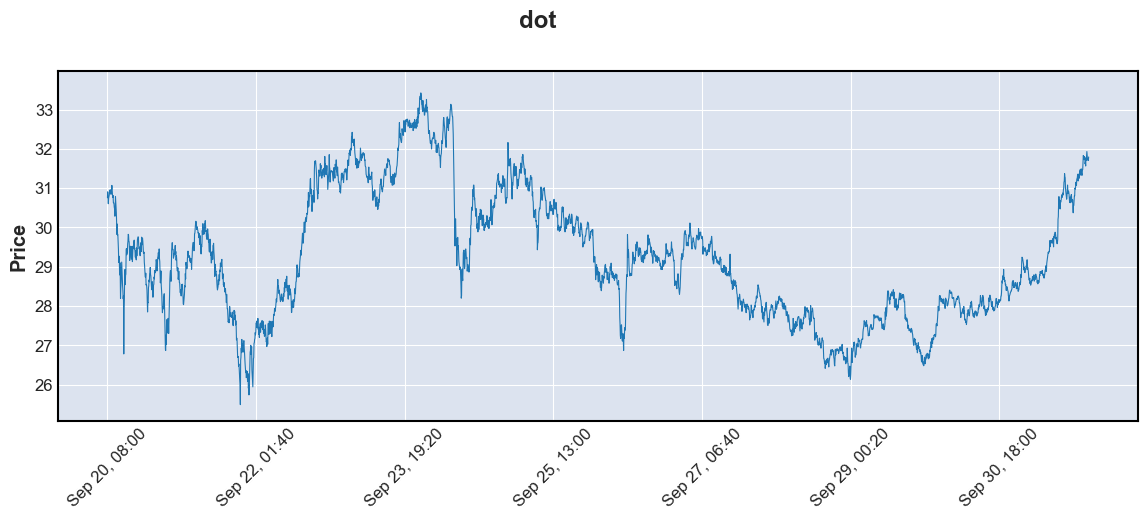

In [102]:
# mpf.plot(ds,type='candle', volume=False, title='dot')
mpf.plot(ds,type='line', volume=False, title='dot', figsize=(15, 5))

In [135]:
de = heikenashi(ds)
print(de.shape)
de.head()

(3301, 4)


,Open,High,Low,Close
2021-09-20 08:00:00,30.7185,30.758,30.460,30.66375
2021-09-20 08:05:00,30.6790,30.913,30.570,30.78650
2021-09-20 08:10:00,30.7560,30.996,30.718,30.83425
2021-09-20 08:15:00,30.9010,30.901,30.565,30.67900
2021-09-20 08:20:00,30.7220,30.784,30.566,30.67425


In [138]:
dw = HA(ds)
print(dw.shape)
dw.head()

(3300, 4)


,Open,High,Low,Close
2021-09-20 08:05:00,30.7185,30.913,30.570,30.78650
2021-09-20 08:10:00,30.8315,30.996,30.718,30.83425
2021-09-20 08:15:00,30.8115,30.825,30.565,30.67900
2021-09-20 08:20:00,30.6630,30.784,30.566,30.67425
2021-09-20 08:25:00,30.6735,30.846,30.741,30.77850


In [118]:
ds.index

RangeIndex(start=0, stop=3301, step=1)

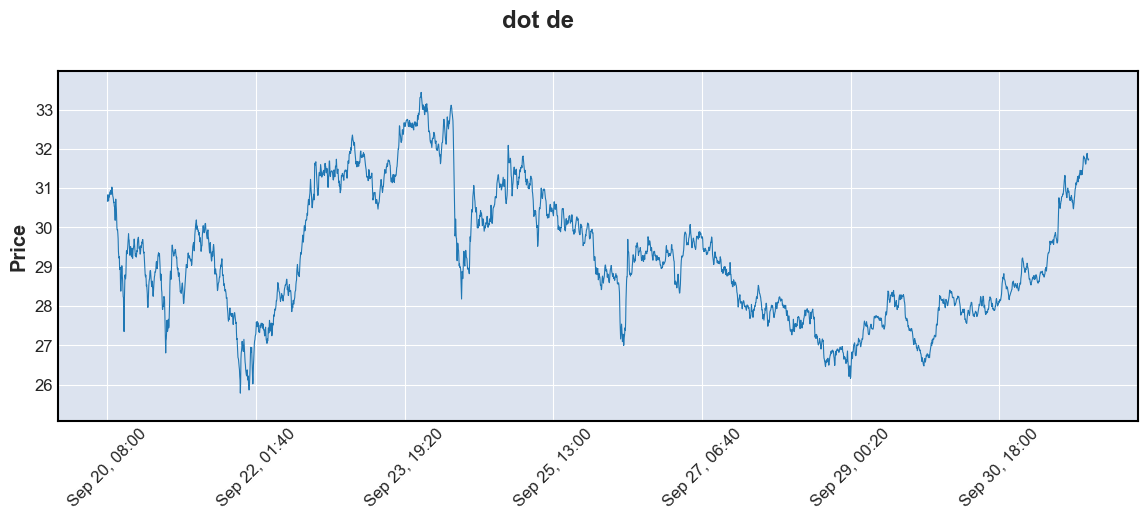

In [141]:
mpf.plot(de, type='line', volume=False, title='dot de', figsize=(15, 5))

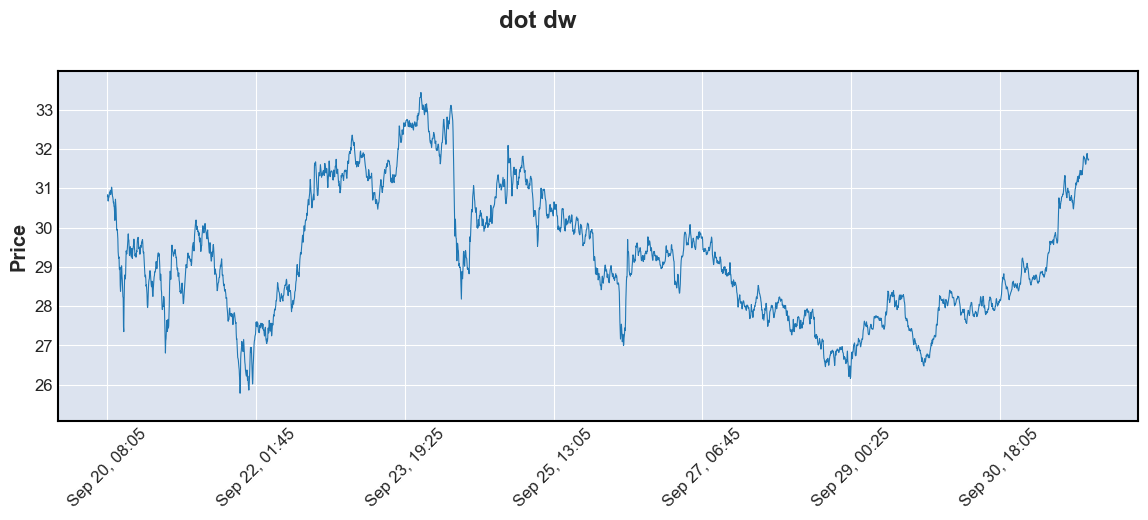

In [142]:
mpf.plot(dw, type='line', volume=False, title='dot dw', figsize=(15, 5))

In [ ]:
HAdf = rel_df[['OPEN', 'HIGH', 'LOW', 'CLOSE']]

HAdf['CLOSE'] = round(((rel_df['OPEN'] + rel_df['HIGH'] + rel_df['LOW'] + rel_df['CLOSE'])/4),2)

for i in range(len(rel_df)):
    if i == 0:
        HAdf.iat[0,0] = round(((rel_df['OPEN'].iloc[0] + rel_df['CLOSE'].iloc[0])/2),2)
    else:
        HAdf.iat[i,0] = round(((HAdf.iat[i-1,0] + HAdf.iat[i-1,3])/2),2)

HAdf['HIGH'] = HAdf.loc[:,['OPEN', 'CLOSE']].join(rel_df['HIGH']).max(axis=1)
HAdf['LOW'] = HAdf.loc[:,['OPEN', 'CLOSE']].join(rel_df['LOW']).min(axis=1)

HAdf.tail(10)

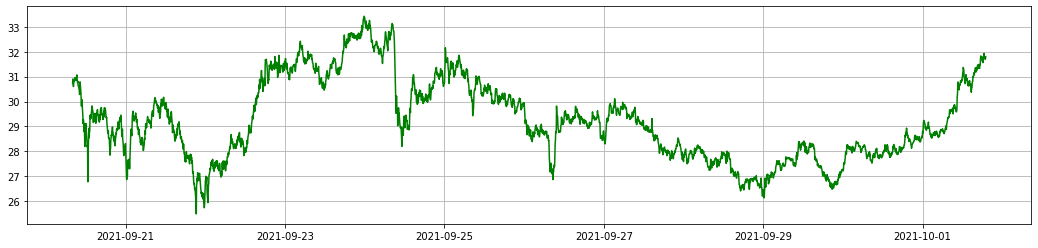

In [70]:
plt.figure(figsize=(18, 4))
# plt.plot(index, SS, ".", c='green')
plt.plot(index, SS, c='green')
plt.grid()
plt.show()

In [57]:
datetime.datetime.fromtimestamp(L3m[0][0]/1000.0) + timedelta(hours=5)

datetime.datetime(2021, 12, 7, 13, 16)

In [58]:
datetime.datetime.fromtimestamp(L3m[0][6]/1000.0) + timedelta(hours=5)

datetime.datetime(2021, 12, 7, 13, 16, 59, 999000)